# Data transformation for ml

This notebook will work on retreived dataset and try to create sample function to handle data into pipelines

**Main goals are**: 
- Create reusable methods
- Being able to filter according to previously defined masks

In [3]:
from local_lib.dataset import retreiveDatasetFromCsv

dataset = retreiveDatasetFromCsv(30)
dataset

,pixel_value,class
0,"[44, 41, 39, 40, 40, 41, 43, 43, 42, 42, 43, 4...",0
1,"[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...",2
2,"[109, 110, 107, 103, 102, 100, 97, 98, 100, 10...",0
3,"[0, 53, 55, 53, 54, 55, 57, 59, 57, 57, 61, 60...",0
4,"[46, 46, 47, 47, 48, 48, 49, 49, 49, 49, 49, 4...",2
5,"[0, 1, 3, 7, 9, 7, 6, 7, 7, 7, 7, 7, 7, 8, 8, ...",1
6,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",2
7,"[25, 25, 23, 22, 20, 19, 19, 19, 18, 19, 16, 1...",2
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
9,"[64, 64, 65, 65, 65, 64, 64, 63, 63, 62, 62, 6...",2


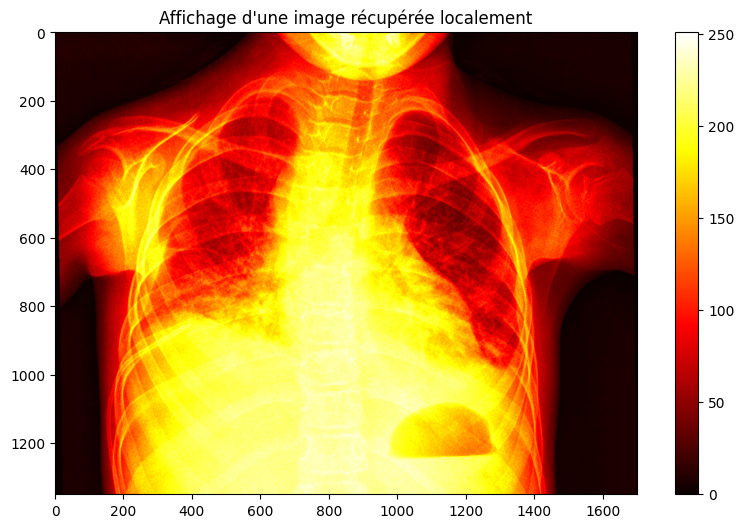

In [4]:
from local_lib.common import common_height
from local_lib.common import common_width
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

image_array = dataset.iloc[5]["pixel_value"].reshape(common_height, common_width)
plt.figure(figsize=(10, 6))
plt.imshow(image_array, cmap='hot')
plt.colorbar()
plt.title('Affichage d\'une image récupérée localement')
plt.show()

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
    
class MaskSeuilTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='baseline'):
        self.strategy = strategy

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        transformed_images = []
        mask = []

        if self.strategy == 'baseline':
            mask = pd.read_csv("../../datasets/chest_Xray/_processed_resize/data_mask_seuil.csv", delimiter=",") 
        elif self.strategy == 'geometry':
            mask = pd.read_csv("../../datasets/chest_Xray/_processed_resize/data_mask_triangle.csv", delimiter=",") 
        elif self.strategy == 'combined':
            mask = pd.read_csv("../../datasets/chest_Xray/_processed_resize/data_mask_seuil_triangle.csv", delimiter=",") 
        else:
            raise ValueError("Unsupported strategy")

        for array_image in X:
            reshaped_data = array_image.reshape(common_height, common_width)
            masked_image_array = np.where(mask == 1, reshaped_data, 0)
            transformed_images.append(masked_image_array.flatten())
            
        return np.array(transformed_images)
    

pipeline = Pipeline([
    ('image_mask', MaskSeuilTransformer(strategy='combined')),
])


# Fit and transform data
X_train_transformed = pipeline.fit_transform(dataset[:10]["pixel_value"])
    

In [26]:
X_train_transformed[2]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Trying our differents strategies**

**Combined**

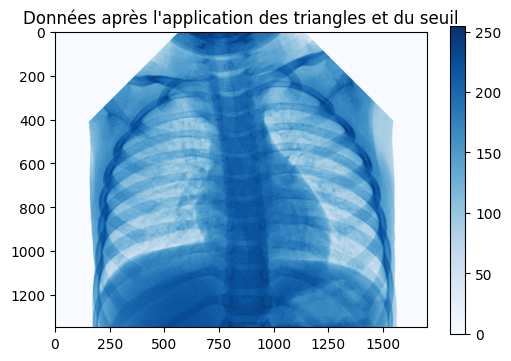

In [27]:
display_sample = X_train_transformed[2].reshape(common_height, common_width)
image_array = np.array(display_sample)
plt.figure(figsize=(6, 4))
plt.imshow(image_array, cmap='Blues')
plt.colorbar()
plt.title('Données après l\'application des triangles et du seuil')
plt.show()

**Baseline**

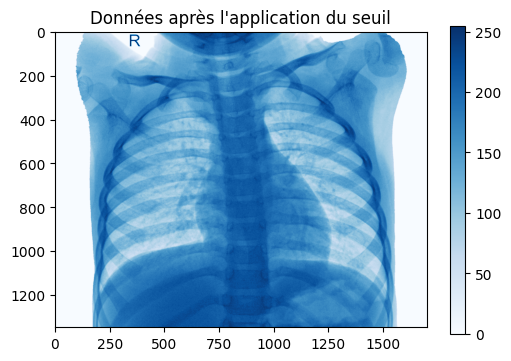

In [28]:
pipeline = Pipeline([
    ('image_mask', MaskSeuilTransformer(strategy='baseline')),
])
# Fit and transform data
X_train_transformed = pipeline.fit_transform(dataset[:10]["pixel_value"])

display_sample = X_train_transformed[2].reshape(common_height, common_width)
image_array = np.array(display_sample)
plt.figure(figsize=(6, 4))
plt.imshow(image_array, cmap='Blues')
plt.colorbar()
plt.title('Données après l\'application du seuil')
plt.show()

**Geometry**

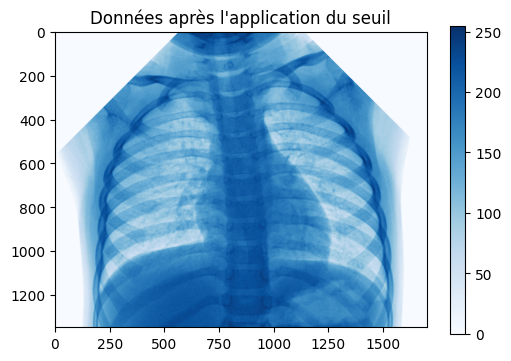

In [29]:
pipeline = Pipeline([
    ('image_mask', MaskSeuilTransformer(strategy='geometry')),
])
# Fit and transform data
X_train_transformed = pipeline.fit_transform(dataset[:10]["pixel_value"])

display_sample = X_train_transformed[2].reshape(common_height, common_width)
image_array = np.array(display_sample)
plt.figure(figsize=(6, 4))
plt.imshow(image_array, cmap='Blues')
plt.colorbar()
plt.title('Données après l\'application du seuil')
plt.show()

### Check if our transformer is compatible with other classic ones

**StandardScaler**

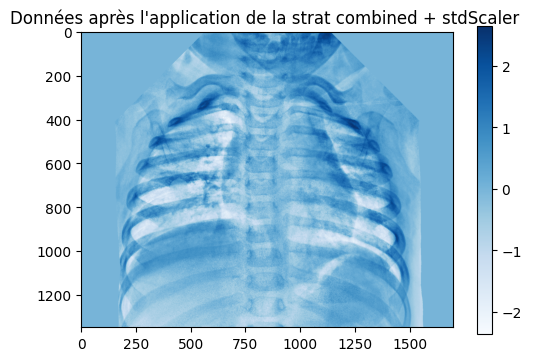

In [39]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier


pipeline = Pipeline([
    ('image_mask', MaskSeuilTransformer(strategy='combined')),
    ('std_scaler', StandardScaler())
])

result = pipeline.fit_transform(dataset[:10]["pixel_value"])

result = result[0].reshape(common_height, common_width)

plt.figure(figsize=(6, 4))
plt.imshow(result, cmap='Blues')
plt.colorbar()
plt.title('Données après l\'application de la strat combined + stdScaler ')
plt.show()

It seems that we loose some data by reducing the lisibility of the image

**MinMaxScaler**

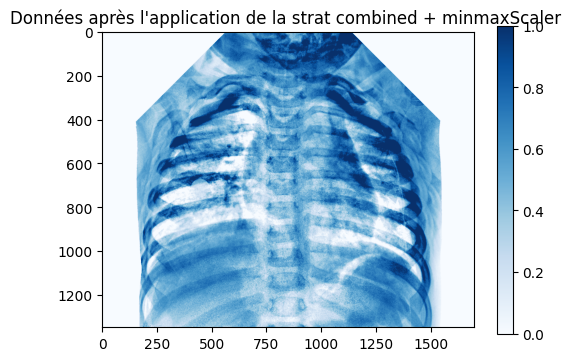

In [42]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('image_mask', MaskSeuilTransformer(strategy='combined')),
    ('minmax_scaler', MinMaxScaler())
])

result = pipeline.fit_transform(dataset[:10]["pixel_value"])

result = result[0].reshape(common_height, common_width)

plt.figure(figsize=(6, 4))
plt.imshow(result, cmap='Blues')
plt.colorbar()
plt.title('Données après l\'application de la strat combined + minmaxScaler ')
plt.show()

The MinMaxScaler seems to keep a better contrast on data with a huge gain on data values.<br>
But, as we are not doctor we couldn't say if it ease the pneumonia detection or not

**Normalizer**

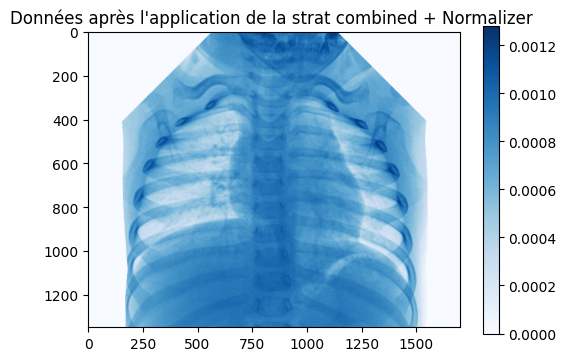

In [43]:
from sklearn.preprocessing import Normalizer, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier


pipeline = Pipeline([
    ('image_mask', MaskSeuilTransformer(strategy='combined')),
    ('norm', Normalizer()),
])

result = pipeline.fit_transform(dataset[:10]["pixel_value"])

result = result[0].reshape(common_height, common_width)

plt.figure(figsize=(6, 4))
plt.imshow(result, cmap='Blues')
plt.colorbar()
plt.title('Données après l\'application de la strat combined + Normalizer ')
plt.show()

Normalizer seems to keep the data as close as possible from the initial state. Without more medical knowledge it more likely to not biases our results.

It seems to be the best transformer, but further tests will come to confirm it.